In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
some_digit = x[36000]
some_digit_image = some_digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

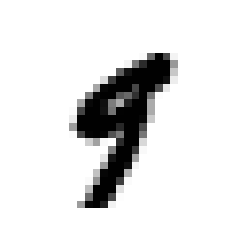

In [6]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest") # showing image as graph
plt.axis("off")

In [7]:
x_train, x_test = x[:60000], x[60000:]

In [8]:
y_train, y_test = y[:60000], y[60000:]

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating binary Classifier

In [10]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(tol=0.1, solver="lbfgs") # solver to remove the warning about it 
clf.fit(x_train, y_train_2)

c:\users\ompra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [12]:
clf.predict([some_digit])

array([False])

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")    

c:\users\ompra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\ompra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

array([0.97925, 0.9791 , 0.9772 ])

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_predicted = cross_val_predict(clf, x_train, y_train_2, cv=3) # cv=3 to split dataset in 3 and train on two and test on remaining until its finished

c:\users\ompra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\ompra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

# Calculating Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_2, y_train_predicted) # (real values, your predicted values)

array([[53558,   484],
       [  805,  5153]], dtype=int64)

In [17]:
# above it detected 805 2s as not 2 and 484 not 2s as 2, we got that from confusion metrics

# Precision and Recall

In [18]:
from sklearn.metrics import precision_score, recall_score

In [19]:
precision_score(y_train_2, y_train_predicted) # (real values, your predicted values)

0.9141387262728402

In [20]:
recall_score(y_train_2, y_train_predicted) # (real values, your predicted values)

0.8648875461564284

# F1 Score

In [21]:
from sklearn.metrics import f1_score

f1_score(y_train_2, y_train_predicted) # (real values, your predicted values)

0.8888313928417422

we can't make recall as well as precision high at a same time they are inversely proportional to each other

# Precision Recall Curve

In [24]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")
precision, recall, threshhold = precision_recall_curve(y_train_2, y_scores)

c:\users\ompra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\ompra\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

# Precision Recall curve plotting

(0.0, 1.0)

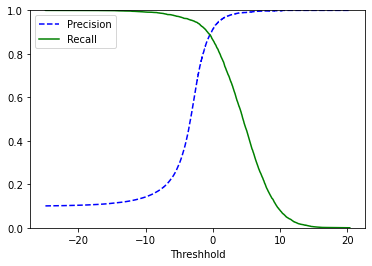

In [28]:
plt.plot(threshhold, precision[:-1], "b--", label="Precision") # b-- to identify as blue dotted line
plt.plot(threshhold, recall[:-1], "g-", label="Recall") # g- for straight green line
plt.xlabel("Threshhold")
plt.legend(loc="upper left")
plt.ylim([0, 1]) # takes a limit in list as argument to plot between values